In [4]:
# Brianna's Exploratory Data Analysis (EDA)

# This notebook performs an initial exploration of the merged movie dataset
# (created during the integration phase of the pipeline). The goal of this EDA
# is to build familiarity with the data, confirm that it loaded correctly, and
# inspect the structure, distributions, and key variables related to our research
# questions.

# Specifically, this early-stage analysis supports our research by:
# - Identifying important variables (genre, budget, runtime, release year,
#   popularity, and ratings) and confirming they are usable.
# - Beginning to observe potential relationships, such as how ratings compare
#   between IMDb and TMDB.
# - Ensuring that the dataset produced by the data pipeline is clean, complete,
#   and ready for deeper analysis next week.

# This notebook is intentionally surface-level, focused on understanding,
# visualizing, and validating the data before conducting more advanced statistical
# and modeling work.

#I will begin by reading in the integrated set to confirm it can be read in properly

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
df = pd.read_csv("integration_output/merged_movies.csv")
df.head()

,title,release_year,director,genre_imdb,genre_tmdb,rating_imdb,vote_average_tmdb,vote_count_tmdb,budget_in_millions,revenue_in_millions,gross_in_millions,popularity,runtime_imdb,runtime_tmdb,metascore,_merge_status
0,The Shawshank Redemption,1994,Frank Darabont,Drama,"Crime, Drama",9.3,8.5,8205.0,25.00,28.341469,28.34,136.747729,142,142.0,82,both
1,The Godfather,1972,Francis Ford Coppola,"Crime, Drama","Crime, Drama",9.2,8.4,5893.0,6.00,245.066411,134.97,143.659698,175,175.0,100,both
2,The Dark Knight,2008,Christopher Nolan,"Action, Crime, Drama","Action, Crime, Drama, Thriller",9.0,8.2,12002.0,185.00,1004.558444,534.86,187.322927,152,152.0,84,both
3,Schindler's List,1993,Steven Spielberg,"Biography, Drama, History","Drama, History, War",9.0,8.3,4329.0,22.00,321.365567,96.90,104.469351,195,195.0,95,both
4,12 Angry Men,1957,Sidney Lumet,"Crime, Drama",Drama,9.0,8.2,2078.0,0.35,1.000000,4.36,59.259204,96,96.0,97,both


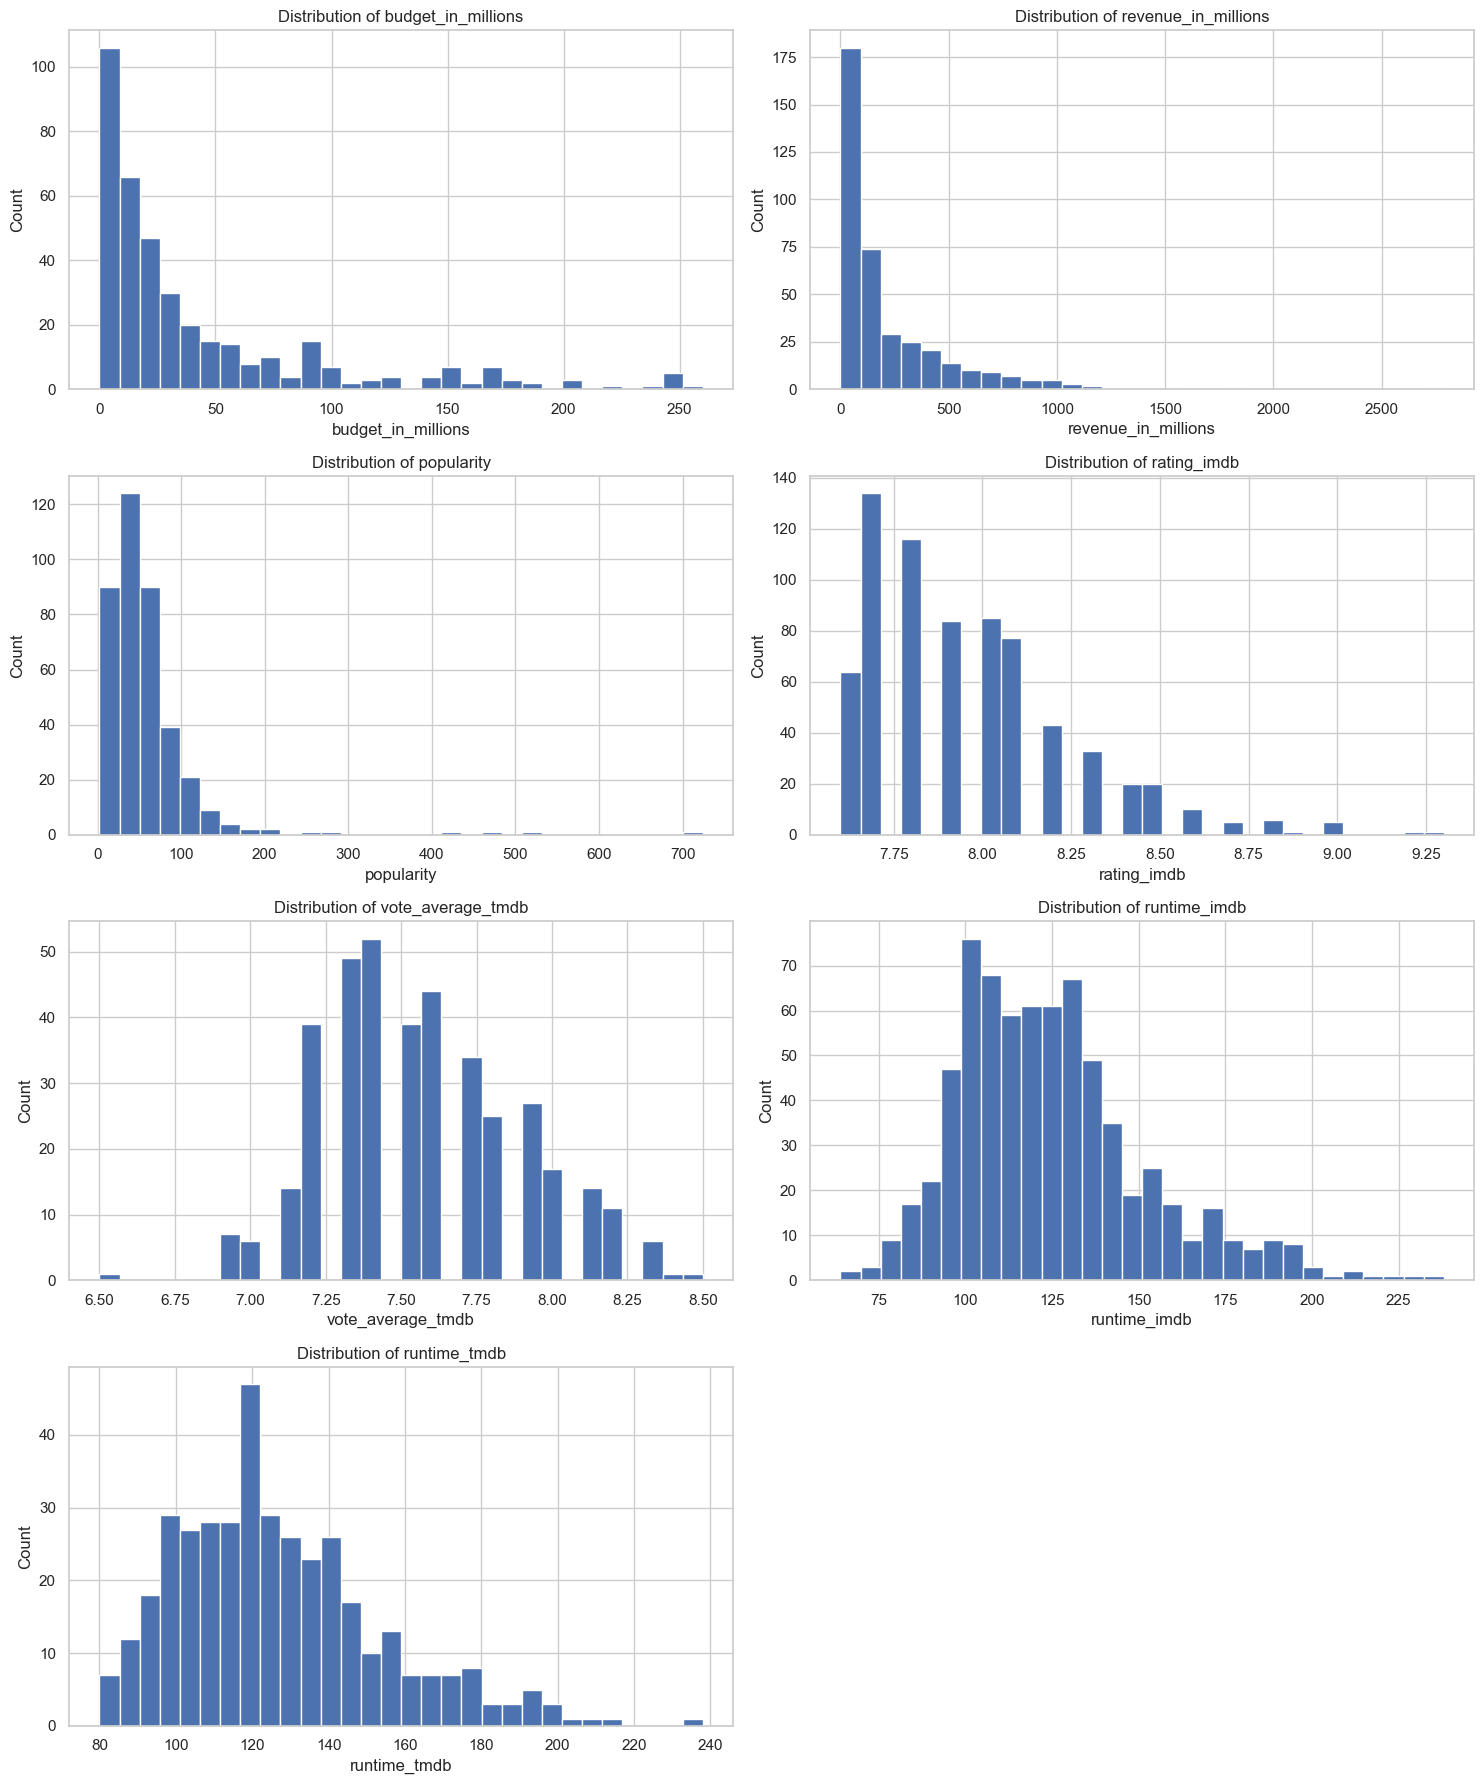

In [5]:
# Distribution of Numeric Variables:
# I will now examine the distributions of:

#- `budget_in_millions`
#- `revenue_in_millions`
# - `popularity`
# - `rating_imdb`
# - `vote_average_tmdb`
# - `runtime_imdb`
# - `runtime_tmdb`

# These plots will help identify skewness, outliers, and typical ranges.

numeric_vars = [
    "budget_in_millions",
    "revenue_in_millions",
    "popularity",
    "rating_imdb",
    "vote_average_tmdb",
    "runtime_imdb",
    "runtime_tmdb",
]

plt.figure(figsize=(15, 18))

for i, col in enumerate(numeric_vars, 1):
    plt.subplot(4, 2, i)
    df[col].hist(bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [ ]:
# Notes on Initial Distribution Patterns (^Above)

# Overall, most numeric variables appear to be right-skewed. This suggests that
# while most movies cluster toward lower budgets, lower popularity scores, and
# moderate ratings/runtimes, a smaller number of films extend far to the right.
# These apparent outliers to the right likely represent very big-budget or highly popular movies.

# Early observations:
# - budget_in_millions and revenue_in_millions feature clear outliers, which may
#   reflect blockbuster films. These will be important to examine more deeply in
#   Week 5 when interpreting how budget relates to popularity and ratings.
# - popularity also shows a long right tail, meaning a few movies dominate the
#   popularity scale compared to most others in the dataset, it also appears to have the most outliers.
# - rating_imdb and vote_average_tmdb are less extreme in their skew but still
#   show clustering toward the left with fewer very high-rated films.
# - both runtime variables (IMDb and TMDB) have similar shapes, indicating good
#   consistency across data sources.

# These early trends help frame our research questions, especially the role of
# budget, genre, and other features in driving popularity and ratings. A more
# in-depth interpretation will follow in Week 5.

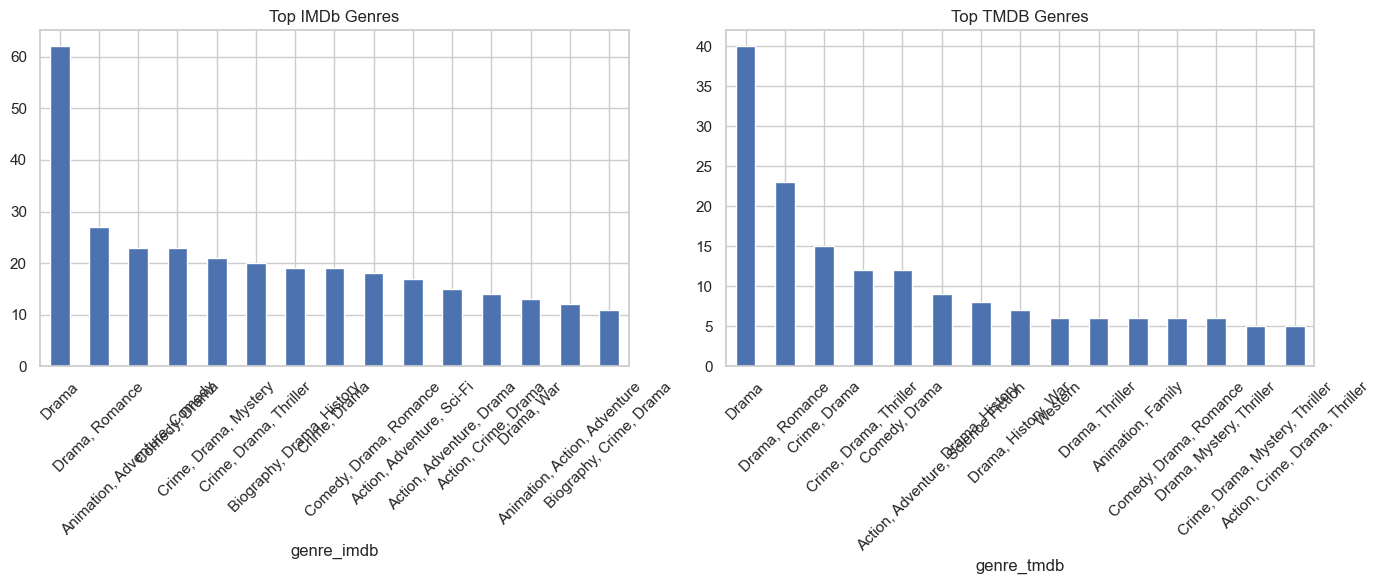

In [7]:
# Distribution of Genre Variables
# This plot allows us to visualize the frequency of genres in IMDb and TMDB listings.

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
df['genre_imdb'].value_counts().head(15).plot(kind='bar')
plt.title("Top IMDb Genres")
plt.xticks(rotation=45)

plt.subplot(1,2,2)
df['genre_tmdb'].value_counts().head(15).plot(kind='bar')
plt.title("Top TMDB Genres")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# Notes on Genre Distributions (^Above)

# The genre distributions for IMDb and TMDB look very similar in shape, which is
# reassuring, as it suggests a strong bond between the two sources in how films are
# categorized. Both lists show "Drama" as the dominant genre by a large margin.

# This early pattern is useful for Week 5:
# - Drama being the most common genre may influence overall averages for ratings
#   and popularity, so any genre-based conclusions will need to account for this
#   imbalance.
# - Genres like Romance, Crime, and Thriller also appear frequently, which may
#   provide enough data to compare trends across major genres.

# The similarity in the two distributions also supports the quality of our data
# integration pipeline—genre alignment appears to be consistent across sources.

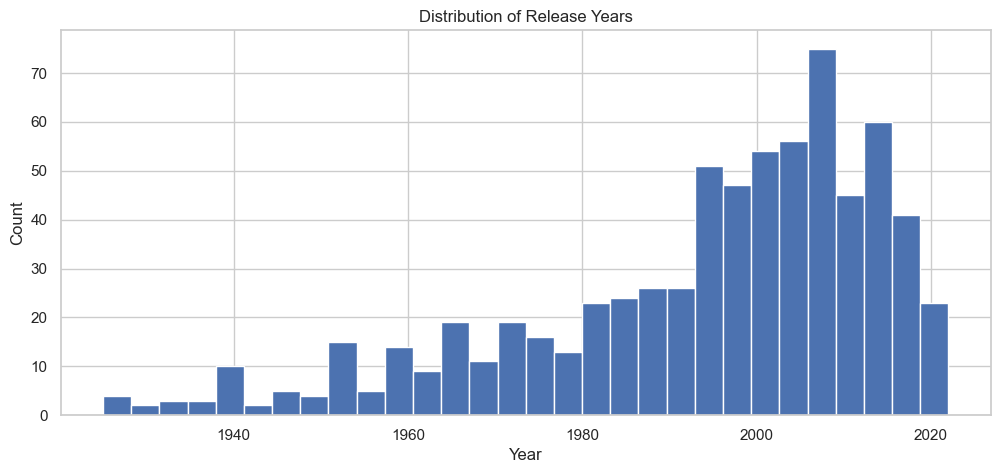

In [8]:
# Release Year Distribution
# Here, I create a simple histogram to show trends in the number of movies released per year.

plt.figure(figsize=(12,5))
df["release_year"].dropna().astype(int).hist(bins=30)
plt.title("Distribution of Release Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

In [ ]:
# Notes on Release Year Distribution (^Above)

# The release year histogram is left-skewed, with a clear peak around 2000–2020.
# This means the dataset contains far more *recent* films than older ones.

# This pattern is important for Week 5 because:
# - Popularity scores (especially from TMDB) may naturally favor newer films,
#   since modern films tend to have more online user engagement.
# - Ratings from IMDb may also be influenced by recency, as older films often
#   accumulate votes slowly over time.
# - Any conclusions about trends over time need to consider that the dataset is
#   not evenly distributed across decades.

# Overall, most of our conclusions will be heavily driven by modern movies,
# so any historical comparisons must be interpreted cautiously.

In [9]:
# Descriptive Statistics
# Computing the mean, median, std, min, max, and missing values for all numeric columns.

desc_stats = df[numeric_vars].describe().T
missing = df[numeric_vars].isna().sum()

desc_stats["missing_values"] = missing
desc_stats

,count,mean,std,min,25%,50%,75%,max,missing_values
budget_in_millions,387.0,43.218147,54.326093,0.000001,7.750000,20.000000,59.000000,260.000000,318
revenue_in_millions,387.0,221.141364,300.223232,0.030471,33.860405,103.911669,307.122064,2787.965087,318
popularity,387.0,59.322839,62.752166,2.186927,27.528037,46.199482,70.427184,724.247784,318
rating_imdb,705.0,7.956738,0.289373,7.600000,7.700000,7.900000,8.100000,9.300000,0
vote_average_tmdb,387.0,7.552455,0.325454,6.500000,7.300000,7.500000,7.800000,8.500000,318
runtime_imdb,705.0,124.527660,27.267293,64.000000,105.000000,121.000000,138.000000,238.000000,0
runtime_tmdb,387.0,126.811370,26.983358,80.000000,108.000000,122.000000,141.000000,238.000000,318


In [ ]:
# Notes on Descriptive Statistics and Acknowledging Missing Data (^Above)

# General Observations from Descriptive Statistics:
# - Numeric variables such as budget_in_millions and revenue_in_millions are right-skewed,
#   with some extreme outliers  (very high-budget or highly-revenue movies). 
# - Popularity also shows right skewness, indicating a few movies dominate user attention.
# - IMDb ratings and TMDB vote averages are relatively tightly distributed (low std dev),
#   suggesting that most movies cluster around typical audience ratings.
# - Runtimes are fairly normally distributed around 120–125 minutes.

# Missing Data Observations:
# - Some variables have a significant number of missing values (budget_in_millions, revenue_in_millions, vote_average_tmdb, runtime_tmdb).
# - This is expected due to differences in dataset coverage and integration, older or less-popular movies
#   often lack full metadata.
# - Certain variables like rating_imdb and runtime_imdb have no missing values,
#   which ensures we can safely analyze these without worrying about gaps.

# Strategy for Week 5 Analysis while accounting for the missing data:
# - For each analysis, we will use rows that contain the relevant variables.
#   Example: if analyzing IMDb rating trends, we only need rating_imdb and runtime_imdb, which are complete.
# - For analyses involving popularity, budget, or TMDB-specific variables,
#   rows missing these fields will be excluded to ensure clarity and avoid misleading results.
# - This cautious approach ensures that the visualizations and conclusions in Week 5
#   will be based on complete, reliable data for the variables being examined.
# - Documenting missing data now helps provide transparency and reassurance
#   that all data limitations are acknowledged and accounted for.

In [10]:
# Correlation Matrix with Numeric Values

corr = df[numeric_vars].corr()
corr

,budget_in_millions,revenue_in_millions,popularity,rating_imdb,vote_average_tmdb,runtime_imdb,runtime_tmdb
budget_in_millions,1.000000,0.772612,0.454987,-0.008951,-0.137119,0.184159,0.186420
revenue_in_millions,0.772612,1.000000,0.464592,0.108572,-0.050615,0.186897,0.189325
popularity,0.454987,0.464592,1.000000,0.292229,0.209842,0.098781,0.098565
rating_imdb,-0.008951,0.108572,0.292229,1.000000,0.836722,0.259016,0.289737
vote_average_tmdb,-0.137119,-0.050615,0.209842,0.836722,1.000000,0.193551,0.196865
runtime_imdb,0.184159,0.186897,0.098781,0.259016,0.193551,1.000000,0.996281
runtime_tmdb,0.186420,0.189325,0.098565,0.289737,0.196865,0.996281,1.000000


In [ ]:
# Notes on Correlation Matrix (^Above):
# Budget vs Revenue:
# - Strong positive correlation (0.77) between budget_in_millions and revenue_in_millions.
# - This aligns with the expectation that higher-budget movies tend to earn more revenue,
#   but it will be interesting in Week 5 to see if there are exceptions (high budget/low revenue or vice versa).

#  Popularity:
# - Moderate positive correlation with budget (0.45) and revenue (0.46), suggesting that bigger movies
#   tend to attract more audience attention.
# - Weak correlation with runtime and other factors, it will be interesting to explore genre or release year influence in Week 5.

# IMDb vs TMDB Ratings:
# - Very strong correlation (0.84) between rating_imdb and vote_average_tmdb.
# - This is reassuring and confirms that both rating systems capture similar audience perceptions.
# - Week 5 could look at movies where the IMDb and TMDB ratings are very different, as these might be unusual or less common films, 
# and these could be interesting to dive deep into.

# Runtime:
# - Extremely strong correlation (0.996) between runtime_imdb and runtime_tmdb.
# - This confirms consistency between datasets, so runtime can be safely used without worrying about major discrepancies.

# Minor negative correlations:
# - Budget has a slight negative correlation with vote_average_tmdb (0.14), which is interesting.
# - Could investigate if higher-budget films are not necessarily rated higher on TMDB, despite doing better at the box office.

# Week 5 Focus:
# - Investigate high/low budget vs revenue outliers.
# - Explore movies with unusual popularity patterns given their budget or runtime.
# - Compare IMDb vs TMDB rating outliers for deeper insights into audience preferences.
# - Correlations will inform which variables to highlight in visualizations and initial interpretations.

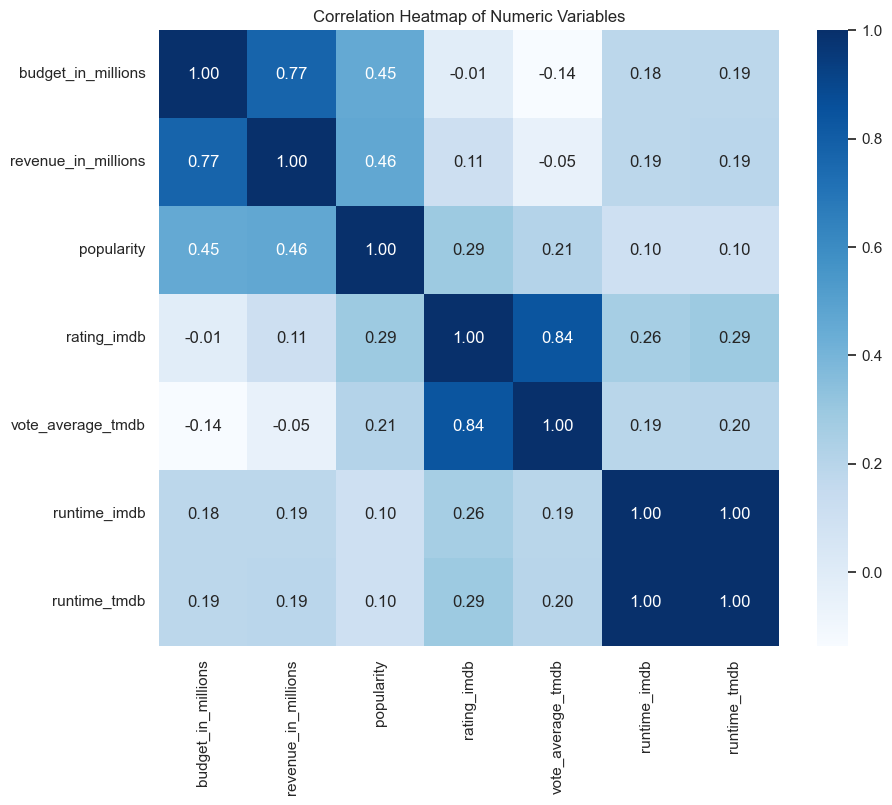

In [11]:
# Correlation Heatmap
# Visualizing correlations highlights strong relationships, such as:
# - Budget vs revenue
# - Ratings vs popularity
# Darker blue squares indicate stronger correlations, while lighter blue indicates weaker ones.
# It makes patterns easier to spot at a glance, such as the strong link between budget and revenue
# and the moderate relationship between ratings and popularity. We'll explore these further in Week 5.
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Blues")
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()

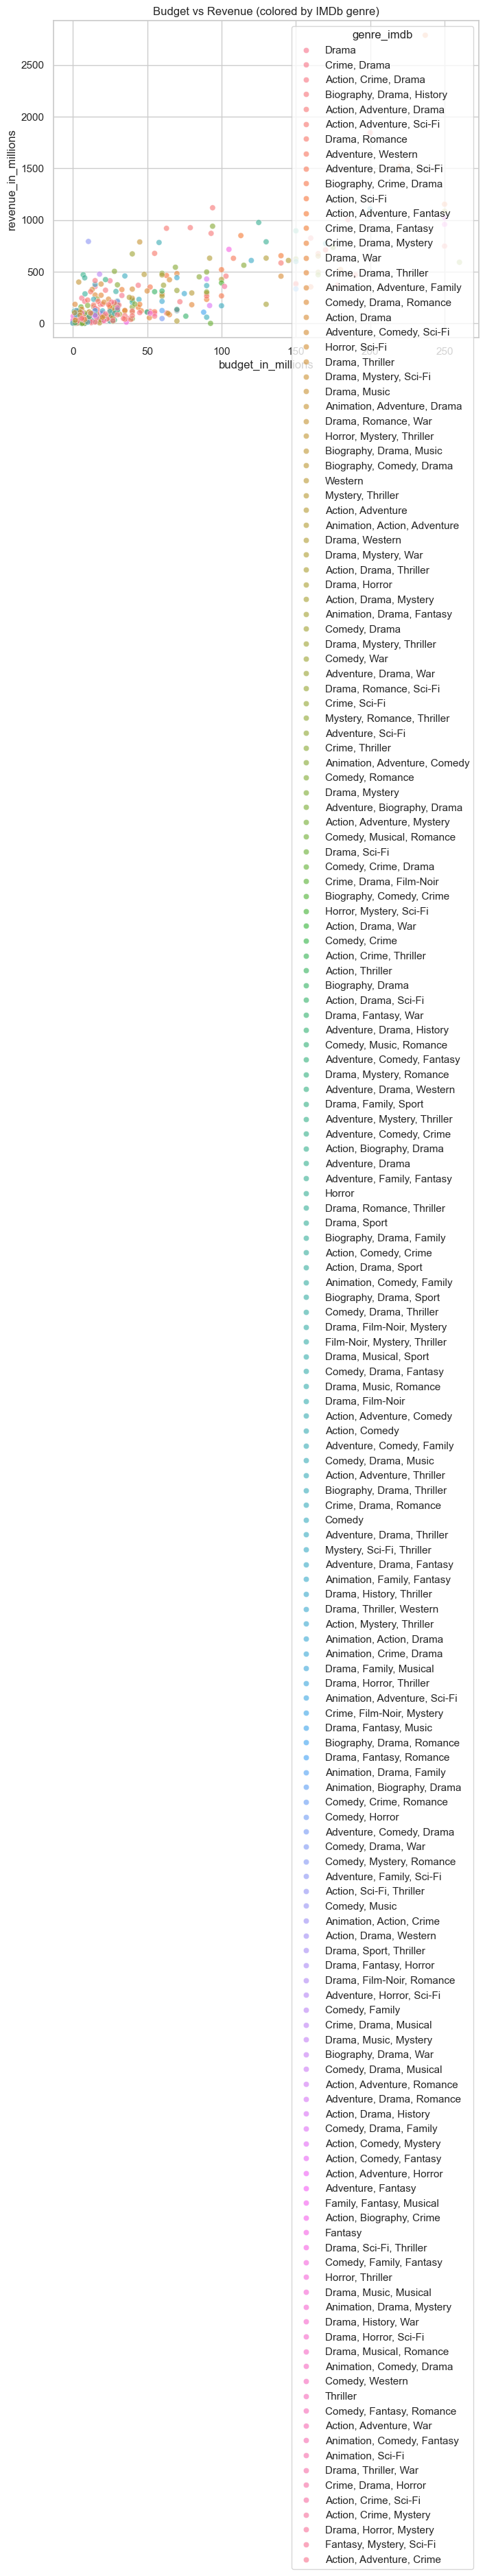

In [13]:
# Scatter Plot: Budget vs Revenue
# This plot shows the relationship between a movie's budget and its revenue.
# Each point represents a movie, and colors indicate the IMDb genre.
# From a quick look, movies with higher budgets tend to earn more revenue, 
# but there are some outliers that deviate from this moderate positively correlation pattern. 
# I will investigate these interesting cases and genre-specific trends more thoroughly in Week 5

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="budget_in_millions",
    y="revenue_in_millions",
    hue="genre_imdb",
    alpha=0.6
)
plt.title("Budget vs Revenue (colored by IMDb genre)")
plt.show()

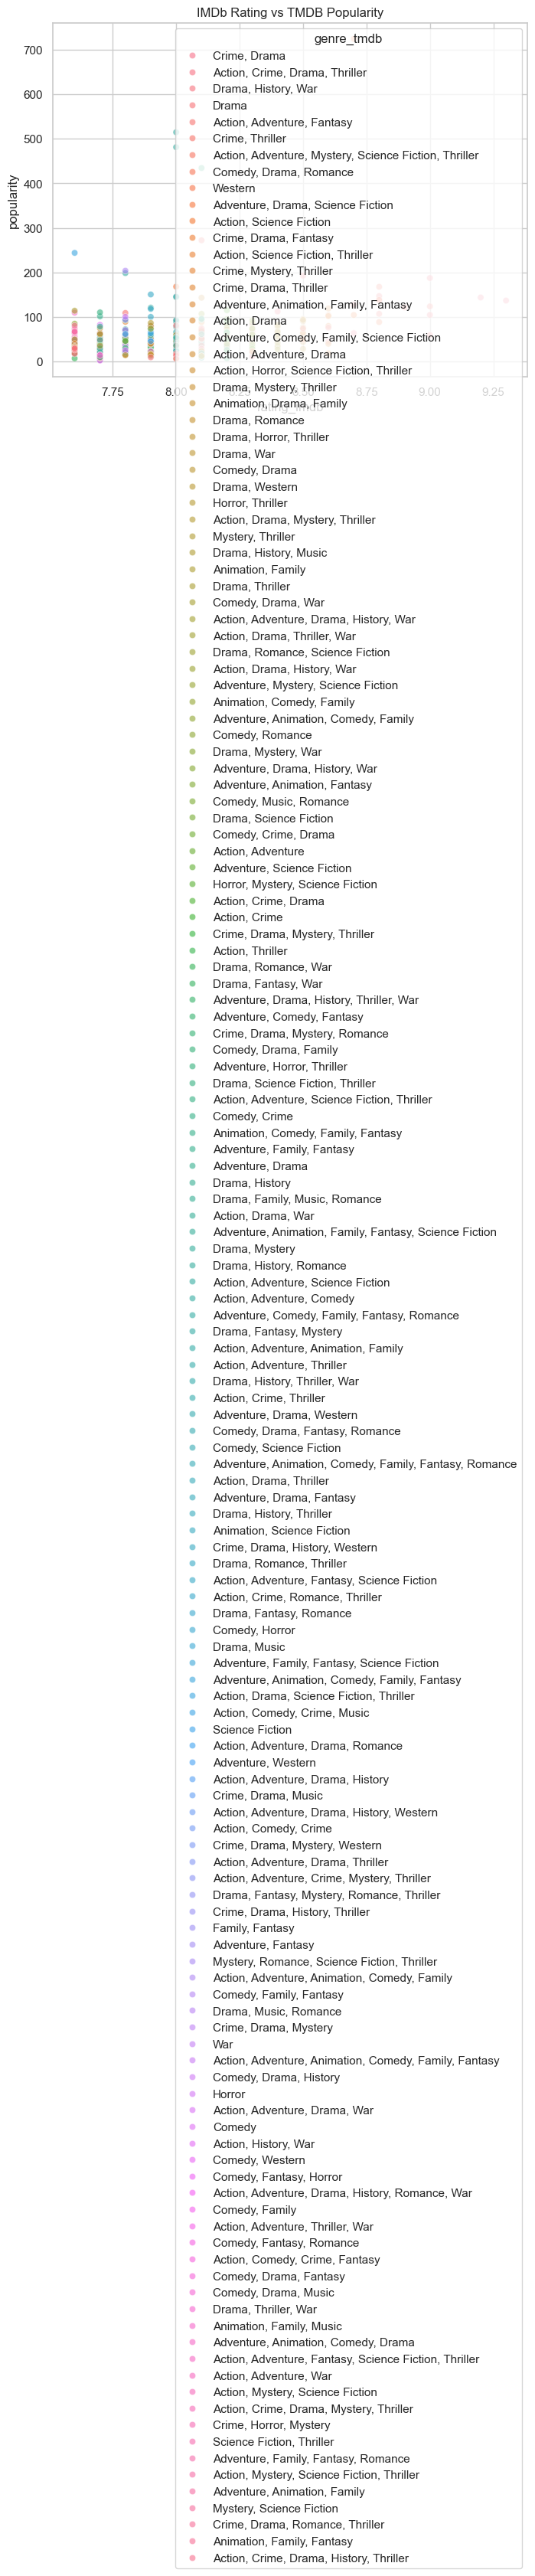

In [14]:
# Scatter Plot: Rating vs Popularity
# This plot examines how IMDb ratings relate to TMDB popularity scores.
# Each point represents a movie, with colors showing the TMDB genre.
# We can see general trends where higher-rated movies may have higher popularity, 
# but there are outliers and exceptions that stand out.
# These interesting cases and potential genre influences will be explored more in Week 5. 
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="rating_imdb",
    y="popularity",
    hue="genre_tmdb",
    alpha=0.6
)
plt.title("IMDb Rating vs TMDB Popularity")
plt.show()

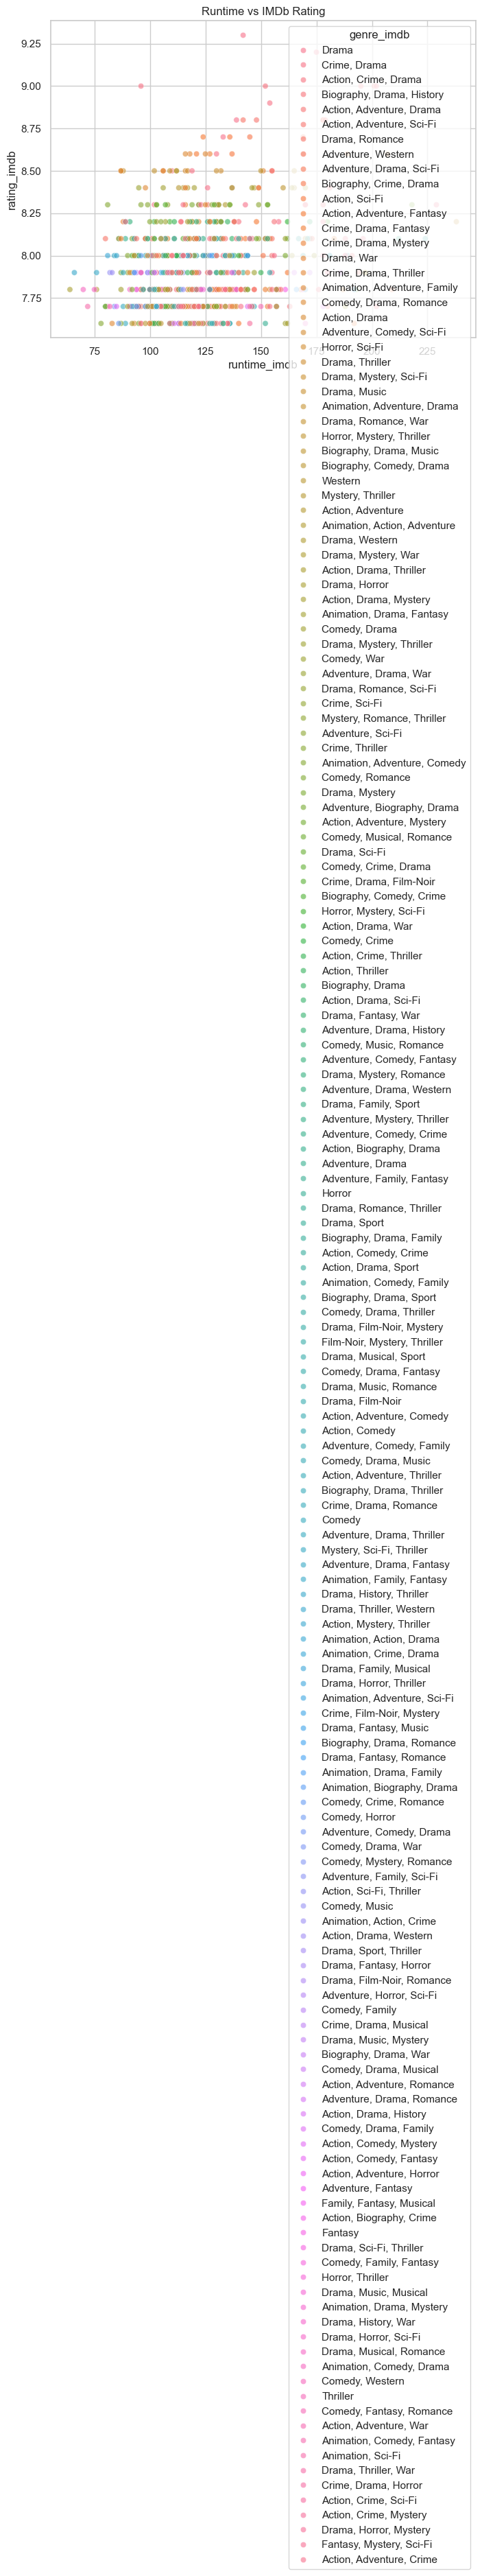

In [15]:
# Scatter Plot: Runtime vs IMDb Rating
# This plot explores the relationship between a movie's runtime and its IMDb rating.
# Each point represents a movie, colored by IMDb genre to see if certain genres trend differently.
# We can spot some patterns, like whether longer movies tend to have higher ratings,
# as well as outliers that deviate from the general moderate positive trend/correlation.
# These observations will be examined in more detail in Week 5 analysis.
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="runtime_imdb",
    y="rating_imdb",
    hue="genre_imdb",
    alpha=0.6
)
plt.title("Runtime vs IMDb Rating")
plt.show()

In [ ]:
# Brianna's Summary of EDA Tasks Completed

#  Variable Analysis:
#  - Plotted distributions of numeric variables: budget, revenue, popularity, IMDb rating, TMDB vote average, runtime (IMDb & TMDB).
#  - Plotted categorical variables: genre (IMDb & TMDB) and release year.
#  - Computed basic descriptive statistics (mean, median, std, min/max) and counted missing values.

#  Correlation Analysis:
#  - Calculated correlations among numeric variables (budget, revenue, ratings, popularity).
#  - Created a correlation heatmap to visualize strong and weak relationships.

# Preliminary Scatter Plots:
#  - Budget vs Revenue
#  - IMDb Rating vs TMDB Popularity
#  - Runtime vs IMDb Rating
#  - Color-coded by genre to identify initial patterns.
#  - Observed potential outliers and trends to explore more deeply in Week 5.

# Missing Data & Quality Checks:
#  - Identified missing or inconsistent values introduced during integration.
#  - Documented which variables have blanks and how they will be handled in Week 5 for analysis.
#  - Noted that rows with missing key variables will be excluded when necessary to ensure clear, conclusive insights.

# Overall, this notebook provides an initial exploratory view of the integrated data.
# In Week 5 I will focus on deeper analysis, interpretation, and polishing the visualizations.